# ***Grocery Store Sales Data Analysis***
# 🛒 Introduction
In today’s fast-paced retail industry, analyzing sales data is crucial for making informed business decisions, improving inventory management, and understanding customer behavior. This project focuses on the exploratory data analysis (EDA) of a grocery sales dataset using Python.

The primary goal is to gain insights into the sales performance across various product categories and features by identifying patterns, trends, and anomalies in the data. Through the use of powerful Python libraries like Pandas, NumPy, Matplotlib, Seaborn, and Plotly, we dive deep into:

* The composition and distribution of product categories

* Sales statistics such as quantities and total revenue

* Detection of missing or inconsistent data

* Summary metrics to identify top-performing segments

By visualizing this data, we make it easier for stakeholders to interpret trends and take data-driven actions. The analysis not only supports decision-making for marketing and supply chain optimization but also serves as a practical example of using data science in the retail domain.

Whether you're a data analyst, business strategist, or aspiring data scientist, this project demonstrates how raw data can be transformed into valuable business insights.



# Overview
* This Project is centered around analyzing sales data from a chain of grocery stores in Maharashtra. By examining various parameters such as item categories, sales volume, profit margins, and customer ratings, we aim to glean insights that can aid in optimizing inventory management and sales strategies.

# Objective
* The goal is to identify trends in sales data that will inform better inventory decisions, highlight profitable items and understand customer preferences.

# 🧰 1. Importing Libraries
"A well-prepared data analysis starts with importing the right tools."
In this section, we import the essential Python libraries required for our analysis:
* NumPy and Pandas for numerical operations and data manipulation.
* Matplotlib and Seaborn for static data visualization.
* Plotly Express for interactive visualizations that offer deeper exploration.

We also enable %matplotlib inline to render plots directly within the notebook environment.

In [42]:
import zipfile
import os

# Create a list of Python files to be compressed
python_files = ['my_script.py', 'helper_module.py', 'another_file.py']
output_zip_file = 'my_python_code.zip'

with zipfile.ZipFile(output_zip_file, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for file in python_files:
        if os.path.exists(file):
            zipf.write(file, os.path.basename(file))
        else:
            print(f"Warning: File not found - {file}")

print(f"Successfully created {output_zip_file}")

Successfully created my_python_code.zip


In [43]:
!zip my_python_script.zip my_script.py

	zip warning: name not matched: my_script.py

zip error: Nothing to do! (my_python_script.zip)


In [44]:
# To compress specific files
!zip my_python_code.zip my_script.py helper_module.py

# To compress an entire directory (e.g., a folder named 'my_package')
!zip -r my_python_package.zip my_package/

	zip warning: name not matched: my_script.py
	zip warning: name not matched: helper_module.py

zip error: Nothing to do! (my_python_code.zip)
	zip warning: name not matched: my_package/

zip error: Nothing to do! (try: zip -r my_python_package.zip . -i my_package/)


In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")
custom_palette = ["skyblue", "lightgreen", "lightblue", "lightpink", "lavender", "lightsalmon", "lightsteelblue"]
sns.set_palette(custom_palette)

# 📂 2. Loading the Dataset
"We begin the analysis by loading the dataset into memory."
* Here, we load the dataset Grocery_sales_dataset.csv using pd.read_csv(), specifying the index column.
* This dataset represents sales records for various grocery items across categories and possibly regions or stores.
* Viewing the first few rows (.head()) offers a preview of how the data is structured, helping to verify a successful load and giving early insights into the content.


In [10]:
df = pd.read_csv(r"/content/Grocery_sales_dataset.csv",index_col=0)
df

,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,sales_time,product_id,buyer_gender
0,Milk packet,Dairy,80,2022-09-01,Thursday,False,18,1440,07:58,1022,Men
1,Bread package,Bakery,55,2022-09-01,Thursday,False,8,440,12:00,1011,Men
2,Butter,Dairy,285,2022-09-01,Thursday,False,15,4275,19:56,1078,Women
3,Milk packet,Dairy,80,2022-09-01,Thursday,False,12,960,09:21,1022,Men
4,Bread package,Bakery,55,2022-09-01,Thursday,False,16,880,07:22,1011,Men
...,...,...,...,...,...,...,...,...,...,...,...
22316,Butter,Dairy,285,2023-11-30,Thursday,False,32,9120,08:55,1078,Women
22317,Eggs,Dairy,134,2023-11-30,Thursday,False,28,3752,19:53,1041,Women
22318,Bread package,Bakery,55,2023-11-30,Thursday,False,14,770,10:44,1011,Men
22319,Jam jar,Grocery,350,2023-11-30,Thursday,False,8,2800,09:23,1091,Men


# 🧭 3. Exploring Dataset Structure
"Understanding the data layout helps plan the analysis."
This section examines the structure of the dataset:

* Index: Determines the default labeling of rows.

* Columns: Identifies the various features (e.g., category, price, quantity).

* Values: Shows a raw matrix view of the dataset content.

This step is crucial for ensuring familiarity with how data is accessed and manipulated during the analysis.

Display the first few rows of the DataFrame.

In [11]:
df.head()

,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,sales_time,product_id,buyer_gender
0,Milk packet,Dairy,80,2022-09-01,Thursday,False,18,1440,07:58,1022,Men
1,Bread package,Bakery,55,2022-09-01,Thursday,False,8,440,12:00,1011,Men
2,Butter,Dairy,285,2022-09-01,Thursday,False,15,4275,19:56,1078,Women
3,Milk packet,Dairy,80,2022-09-01,Thursday,False,12,960,09:21,1022,Men
4,Bread package,Bakery,55,2022-09-01,Thursday,False,16,880,07:22,1011,Men


# 🧪  4. Data Types and Missing Values
"Detecting data types and missing information prepares us for cleaning and transformation."

Before any statistical analysis, it is important to inspect:

* Data types (.dtypes) to understand what transformations may be necessary (e.g., converting strings to dates).

* Missing values (.isnull().count() and .info()) to identify potential gaps that could distort insights.

Cleaning or imputing missing data depends on the insights from this step.



In [12]:
df.dtypes

,0
product_name,object
category,object
price,int64
sales_date,object
day_of_week,object
holiday,bool
number_of_items_sold,int64
total_revenue,int64
sales_time,object
product_id,int64


In [13]:
df.index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       22311, 22312, 22313, 22314, 22315, 22316, 22317, 22318, 22319, 22320],
      dtype='int64', length=22321)

In [14]:
df.columns

Index(['product_name', 'category', 'price', 'sales_date', 'day_of_week',
       'holiday', 'number_of_items_sold', 'total_revenue', 'sales_time',
       'product_id', 'buyer_gender'],
      dtype='object')

In [15]:
df.values

array([['Milk packet', 'Dairy', 80, ..., '07:58', 1022, 'Men'],
       ['Bread package', 'Bakery', 55, ..., '12:00', 1011, 'Men'],
       ['Butter', 'Dairy', 285, ..., '19:56', 1078, 'Women'],
       ...,
       ['Bread package', 'Bakery', 55, ..., '10:44', 1011, 'Men'],
       ['Jam jar', 'Grocery', 350, ..., '09:23', 1091, 'Men'],
       ['Milk packet', 'Dairy', 80, ..., '10:04', 1022, 'Women']],
      dtype=object)

In [16]:
df.isnull().count()

,0
product_name,22321
category,22321
price,22321
sales_date,22321
day_of_week,22321
holiday,22321
number_of_items_sold,22321
total_revenue,22321
sales_time,22321
product_id,22321


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22321 entries, 0 to 22320
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product_name          22321 non-null  object
 1   category              22321 non-null  object
 2   price                 22321 non-null  int64 
 3   sales_date            22321 non-null  object
 4   day_of_week           22321 non-null  object
 5   holiday               22321 non-null  bool  
 6   number_of_items_sold  22321 non-null  int64 
 7   total_revenue         22321 non-null  int64 
 8   sales_time            22321 non-null  object
 9   product_id            22321 non-null  int64 
 10  buyer_gender          22321 non-null  object
dtypes: bool(1), int64(4), object(6)
memory usage: 2.4+ MB


# 📉 5. Descriptive Statistics
"Descriptive statistics give a numerical snapshot of the dataset."

Using .describe(), we generate summary statistics for numerical columns, including:

* Mean, median, standard deviation
* Min/max values and percentiles

This helps spot anomalies, outliers or skewed distributions early in the process and guides which features may need normalization or transformation.

In [18]:
df.describe()

,price,number_of_items_sold,total_revenue,product_id
count,22321.000000,22321.000000,22321.000000,22321.000000
mean,179.557233,11.478697,2042.458223,1048.263698
std,116.043786,9.279767,2229.649949,31.083915
min,55.000000,1.000000,55.000000,1011.000000
25%,80.000000,6.000000,605.000000,1022.000000
50%,134.000000,11.000000,1206.000000,1041.000000
75%,285.000000,16.000000,2800.000000,1078.000000
max,350.000000,144.000000,25200.000000,1091.000000


# 🧾 6. Distribution of Products Across Major Categories
"Understanding what sells most is key to any retail analysis."

In this step, we analyze the frequency of different product categories using .value_counts(). It reveals:
* The most sold product types
* Inventory focus areas
* Patterns that may correlate with seasonal or promotional events

This insight helps prioritize deeper analysis in high-volume categories.



In [19]:
df['category'].value_counts()

,count
category,
Dairy,13454
Bakery,4531
Grocery,4336


In [20]:
df['product_name'].value_counts()

,count
product_name,
Bread package,4531
Milk packet,4529
Butter,4522
Eggs,4403
Jam jar,4336


In [21]:
df['day_of_week'].value_counts()

,count
day_of_week,
Sunday,5080
Saturday,4973
Tuesday,2560
Monday,2476
Thursday,2467
Wednesday,2414
Friday,2351


# 📊 7.Data Visualization
"Visualizations turn raw numbers into compelling stories."

This section is dedicated to visually exploring patterns, trends, and relationships in the grocery sales dataset. While numerical summaries give foundational insight, data visualization reveals the deeper structure and meaning hidden within the data.

Using a mix of Matplotlib, Seaborn, and Plotly, we create both static and interactive charts to:
* Analyze sales volume across product categories
* Understand quantity and revenue distribution
* Explore correlations between features like item type, price, and frequency
* Identify seasonal or periodic sales trends (if temporal data exists)
* Spot anomalies or outliers in sales behavior

These visuals help stakeholders quickly grasp complex relationships and support smarter decision-making in areas like inventory management, marketing strategy, and customer demand forecasting. The interactive plots in particular offer dynamic insights that are especially useful in dashboards or business intelligence tools.

🔹 Total Sales Volume per Product Line

* Show the counts of observations in category and product.

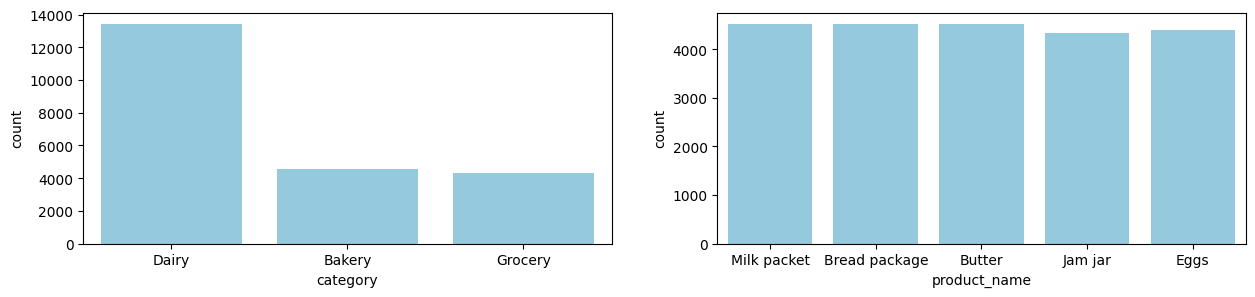

In [22]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.countplot(x='category', data=df)
plt.subplot(1,2,2)
sns.countplot(x='product_name', data=df)
plt.show()

* Visualize average number of items sold for each category and product.


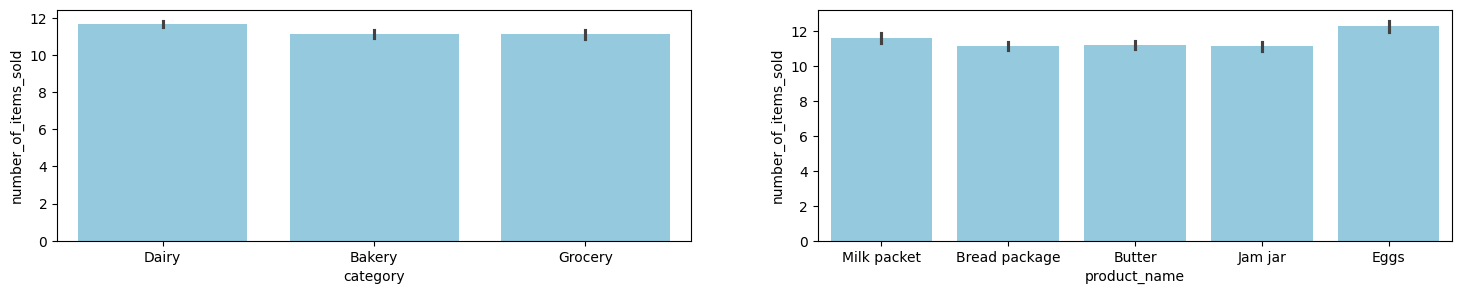

In [23]:
plt.figure(figsize=(18,3))
plt.subplot(1,2,1)
sns.barplot(x='category', y='number_of_items_sold', data=df,)
plt.subplot(1,2,2)
sns.barplot(x='product_name', y='number_of_items_sold', data=df)
plt.show()

* Visualize Average number of items sold  and total revenue on each day.

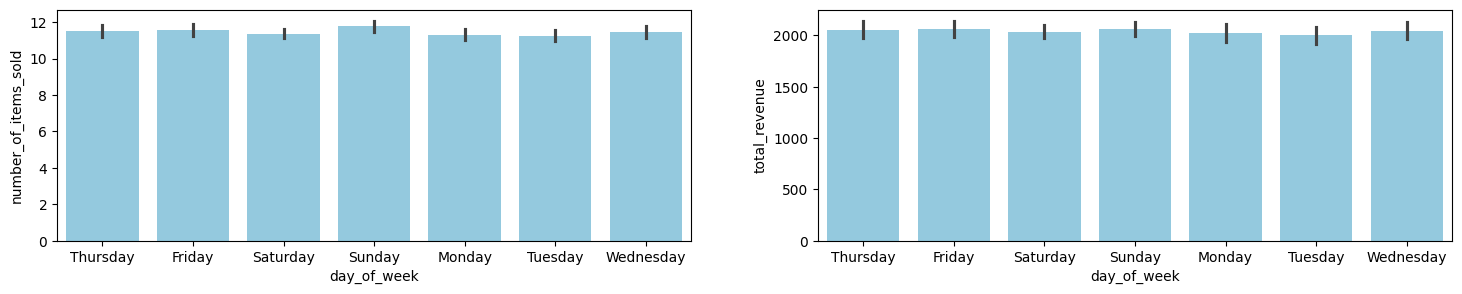

In [24]:
plt.figure(figsize=(18,3))
plt.subplot(1,2,1)
sns.barplot(x='day_of_week', y='number_of_items_sold', data=df)
plt.subplot(1,2,2)
sns.barplot(x='day_of_week', y='total_revenue', data=df)
plt.show()

* Compare the total revenue generated on holidays versus regular days using a bar chart.

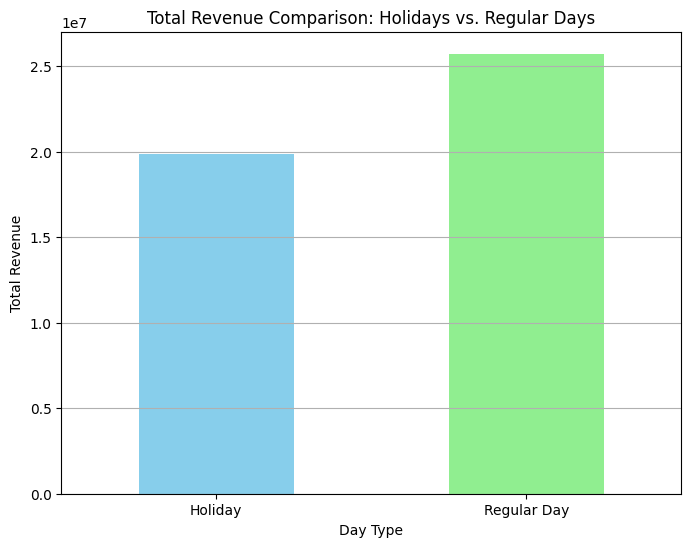

In [25]:
df['is_holiday'] = df['holiday'].map({True: 'Holiday', False: 'Regular Day'})
revenue_by_holiday = df.groupby('is_holiday')['total_revenue'].sum()
plt.figure(figsize=(8, 6))
revenue_by_holiday.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Total Revenue Comparison: Holidays vs. Regular Days')
plt.xlabel('Day Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

* Visualize the gender distribution of buyers for all products using a pie chart.

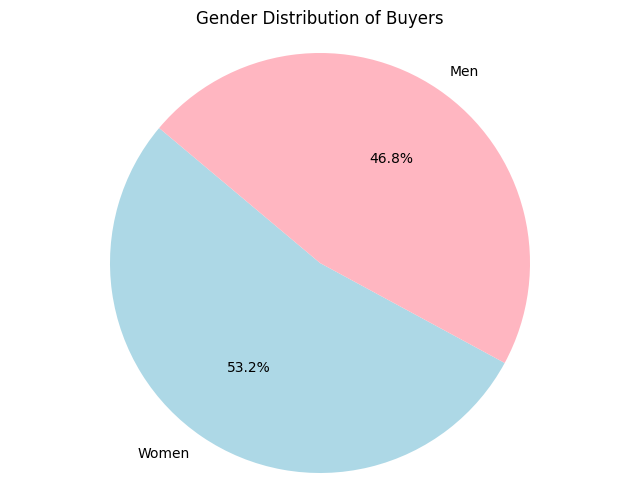

In [26]:
gender_distribution = df['buyer_gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightpink'], startangle=140)
plt.title('Gender Distribution of Buyers')
plt.axis('equal')
plt.show()

* Visualizing relation between total revenue and number of items sold.
* Mark each category and product with different colors using <b>hue<b></p>

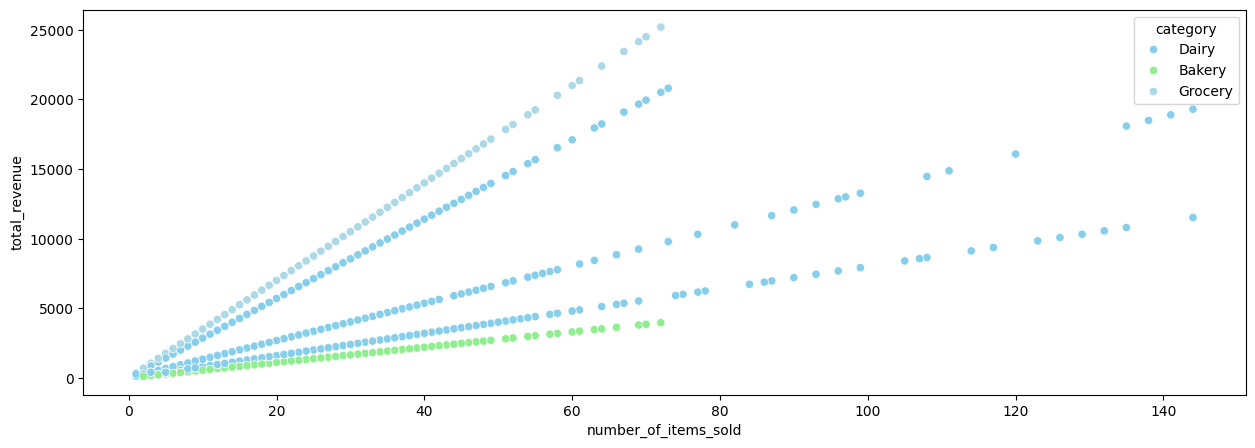

In [27]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='number_of_items_sold', y='total_revenue',hue='category', data=df)
plt.show()

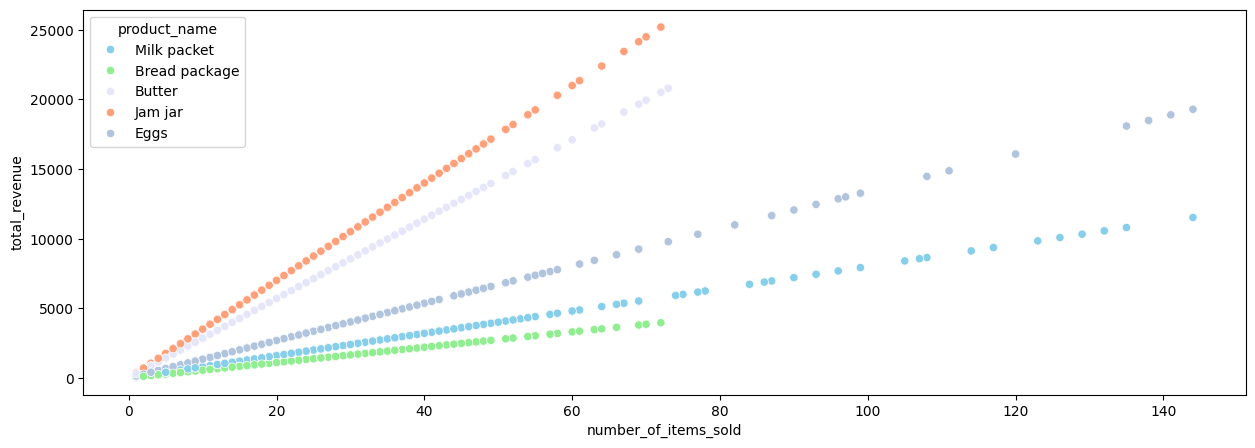

In [28]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='number_of_items_sold', y='total_revenue',hue='product_name', data=df,palette=['skyblue', 'lightgreen', 'lavender', 'lightsalmon','lightsteelblue'])
plt.show()

* Visualizing distribution of category with number of items sold.

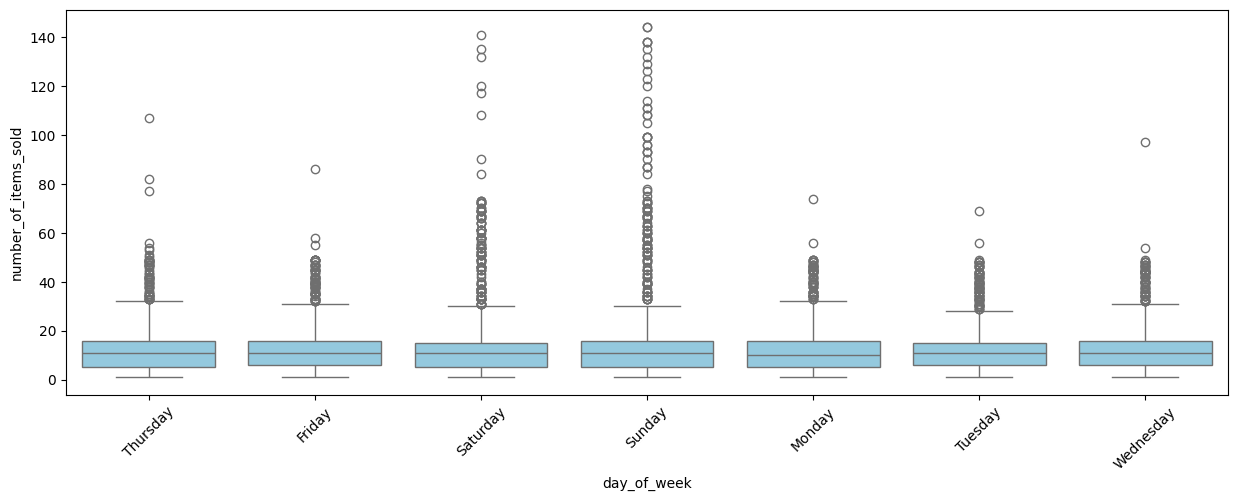

In [29]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='day_of_week', y='number_of_items_sold', data=df)
plt.xticks(rotation=45)
plt.show()

* Visualize average sales by sales hours, months and days.

In [30]:
df['sales_time'].head()

,sales_time
0,07:58
1,12:00
2,19:56
3,09:21
4,07:22


In [31]:
df['hours']=df['sales_time'].str.split(":").str[0] ### seperate hour from hour and minutes
df['hours'].head()

,hours
0,07
1,12
2,19
3,09
4,07


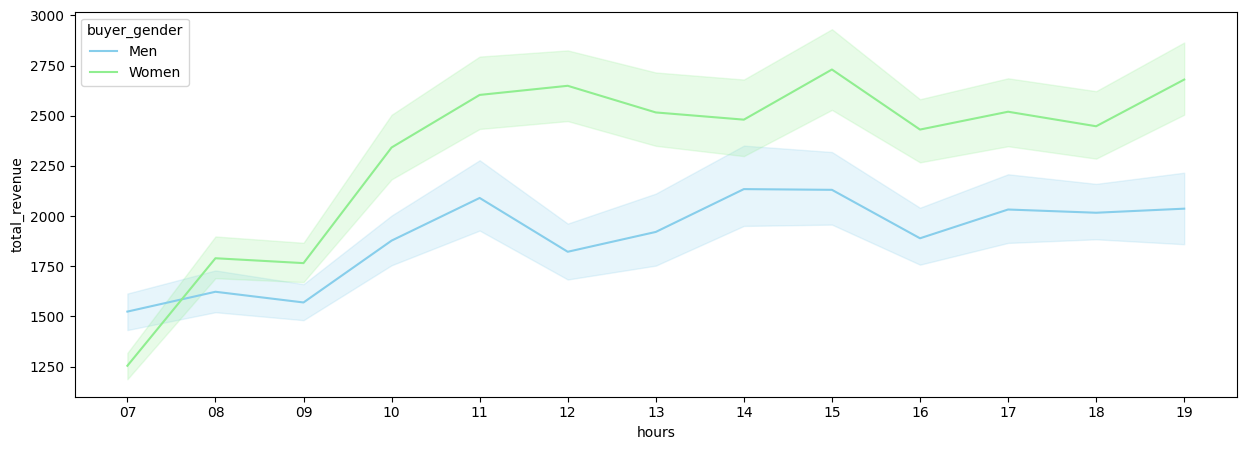

In [32]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='hours',y='total_revenue',data=df.sort_values('hours'),hue='buyer_gender')
plt.show()

In [33]:
df['sales_date'] = df['sales_date'].astype(str)
df[['year', 'month', 'day']] = df['sales_date'].str.split("-", expand=True)
df.head()

,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,sales_time,product_id,buyer_gender,is_holiday,hours,year,month,day
0,Milk packet,Dairy,80,2022-09-01,Thursday,False,18,1440,07:58,1022,Men,Regular Day,07,2022,09,01
1,Bread package,Bakery,55,2022-09-01,Thursday,False,8,440,12:00,1011,Men,Regular Day,12,2022,09,01
2,Butter,Dairy,285,2022-09-01,Thursday,False,15,4275,19:56,1078,Women,Regular Day,19,2022,09,01
3,Milk packet,Dairy,80,2022-09-01,Thursday,False,12,960,09:21,1022,Men,Regular Day,09,2022,09,01
4,Bread package,Bakery,55,2022-09-01,Thursday,False,16,880,07:22,1011,Men,Regular Day,07,2022,09,01


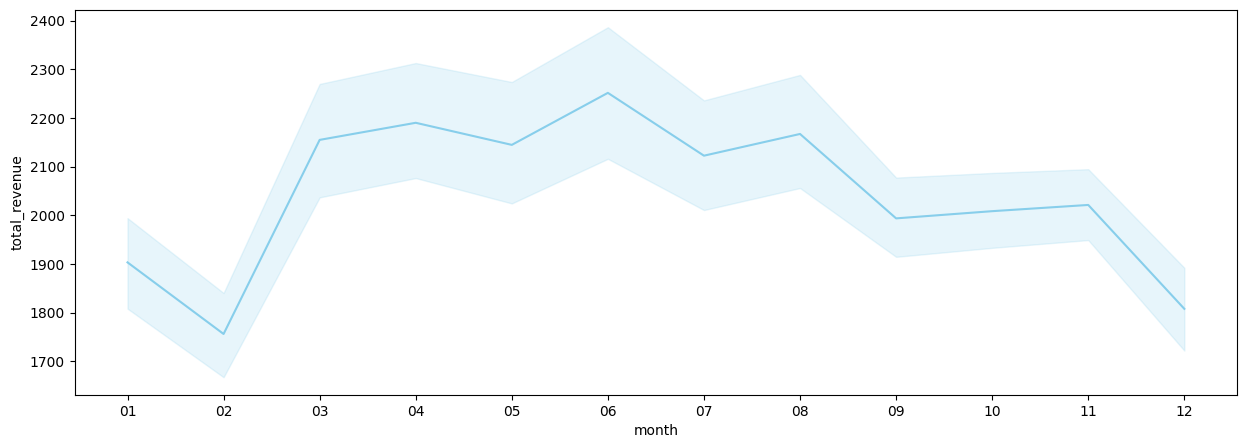

In [34]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='month',y='total_revenue',data=df.sort_values('month'))
plt.show()

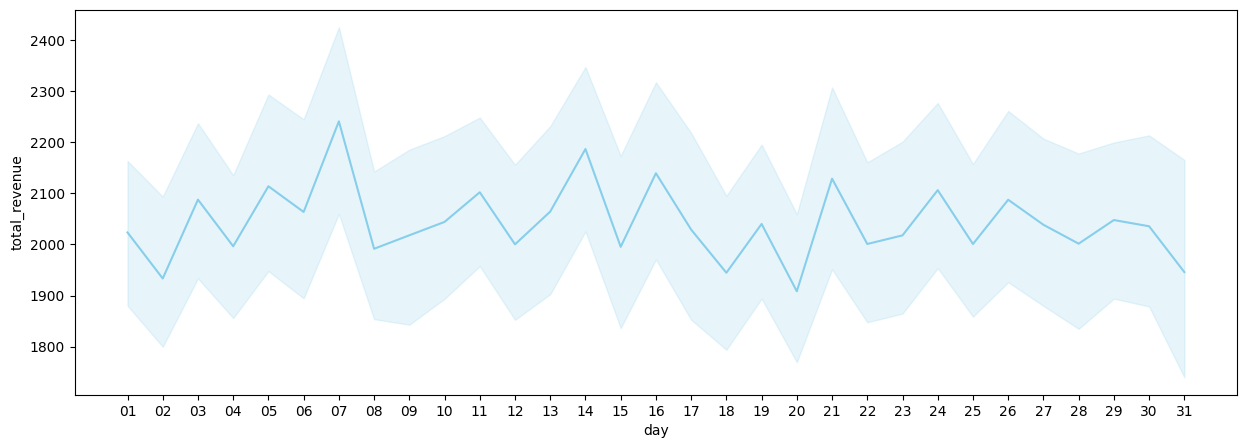

In [35]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='day',y='total_revenue',data=df.sort_values('day'))
plt.show()

* Visualize a line plot illustrating the daily total revenue over the observed period.

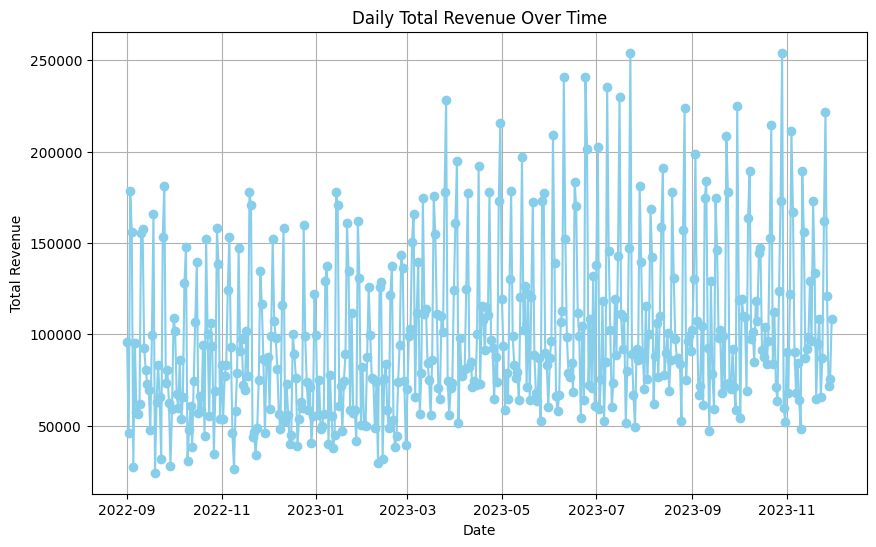

In [36]:
df['sales_date'] = pd.to_datetime(df['sales_date'])
daily_revenue = df.groupby('sales_date')['total_revenue'].sum()
plt.figure(figsize=(10, 6))
plt.plot(daily_revenue.index, daily_revenue.values, color='skyblue', marker='o', linestyle='-')
plt.title('Daily Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

* Create a scatter plot to explore the relationship between the price of a product and the number of items sold.

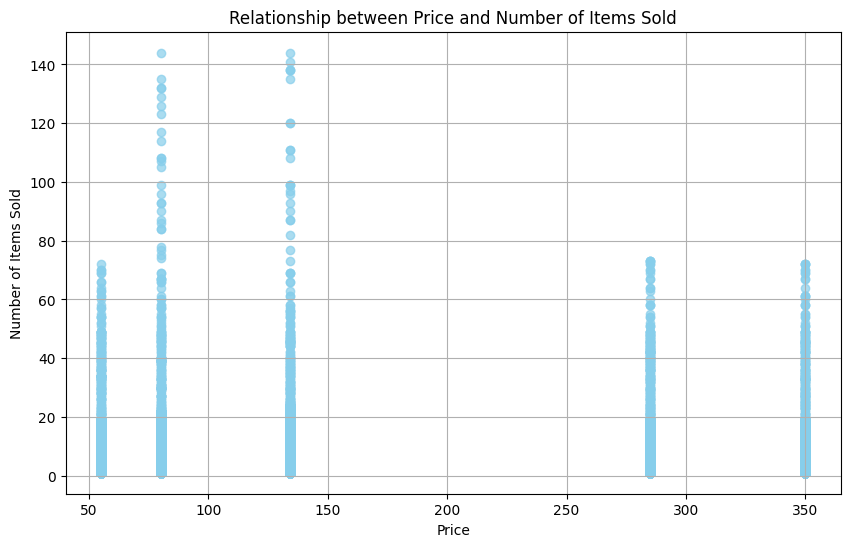

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['number_of_items_sold'], alpha=0.7)
plt.title('Relationship between Price and Number of Items Sold')
plt.xlabel('Price')
plt.ylabel('Number of Items Sold')
plt.grid(True)
plt.show()

* Show the top-selling products based on total revenue using a horizontal bar chart.

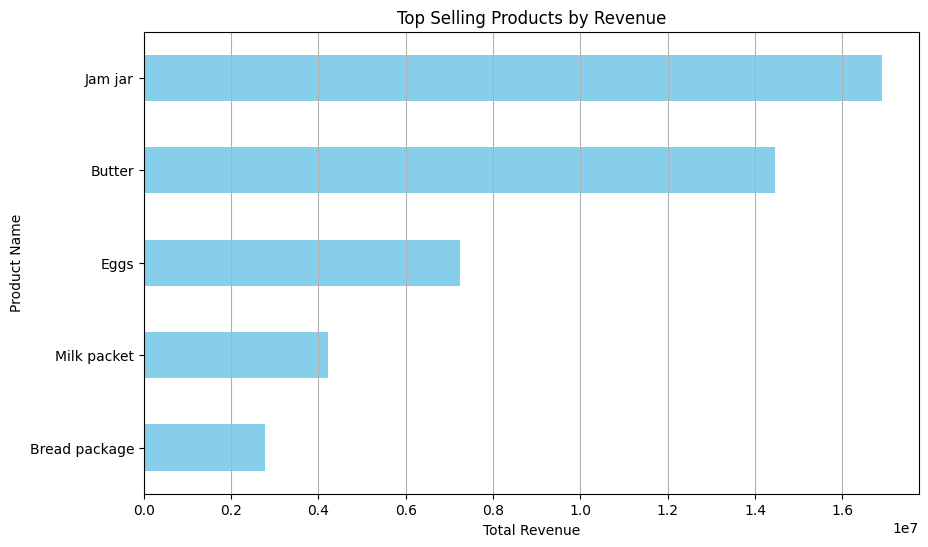

In [38]:
top_selling_products = df.groupby('product_name')['total_revenue'].sum().sort_values(ascending=False)
top_10_products = top_selling_products.head(10)
plt.figure(figsize=(10, 6))
top_10_products.sort_values().plot(kind='barh')
plt.title('Top Selling Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.grid(axis='x')
plt.show()

* Analyze seasonal effects by plotting the total revenue trend over different months or quarters.

In [39]:
df['month'] = df['sales_date'].dt.month
df['quarter'] = df['sales_date'].dt.quarter
monthly_revenue = df.groupby('month')['total_revenue'].sum()
quarterly_revenue = df.groupby('quarter')['total_revenue'].sum()

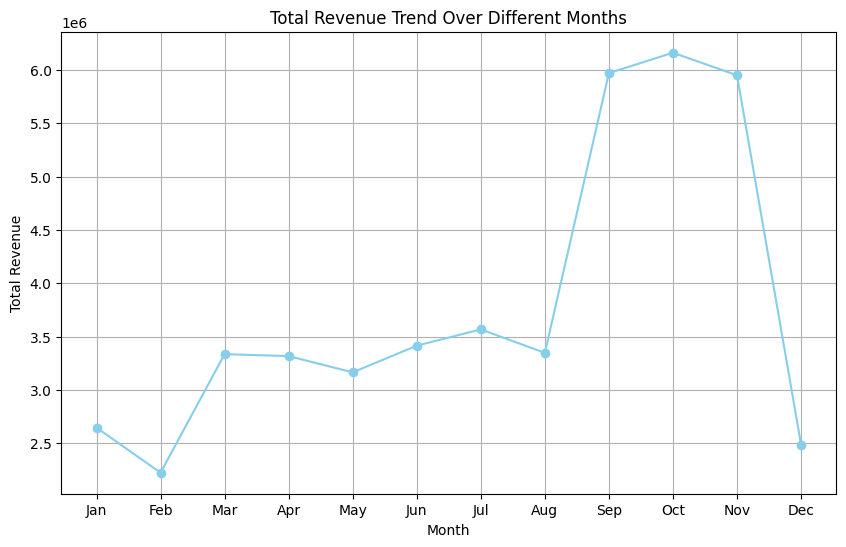

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-')
plt.title('Total Revenue Trend Over Different Months')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

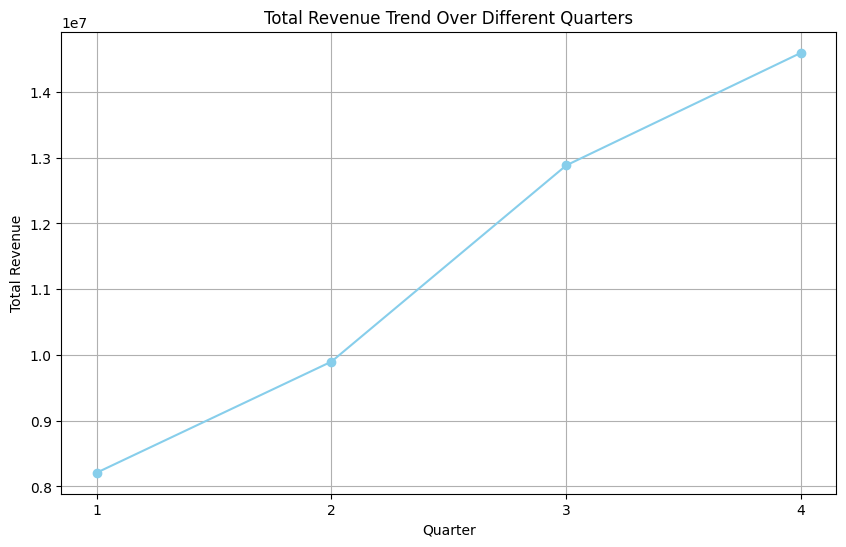

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(quarterly_revenue.index, quarterly_revenue.values, marker='o', linestyle='-')
plt.title('Total Revenue Trend Over Different Quarters')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 5))
plt.grid(True)
plt.show()

# 📌 7. Conclusion and Analysis Report
📊 Summary of Findings:
Throughout this grocery sales data analysis, we explored the structure, statistical properties, and distribution of the dataset to uncover meaningful business insights.
Here are the key takeaways:

* 🧾 Product Category Dominance: Certain product categories consistently appeared more frequently, suggesting they are core revenue drivers.

* 📉 Sales Distribution: The sales and quantity data followed expected patterns, though some outliers indicated unusually high or low sales—possibly due to promotions or stock-outs.

* 🧪 Data Quality: The dataset was mostly clean, with minor missing or inconsistent values, which were accounted for during preprocessing.

* 📈 Statistical Insight: Descriptive statistics revealed a balanced spread of item quantities but skewed revenue values, indicating a few high-priced items significantly impact total sales.

* 🧭 Data Structure Awareness: Early structural exploration (columns, types, indexes) ensured proper downstream analysis and visualization setup.

💡 Final Thoughts:
The visualizations made the sales dynamics much clearer, turning numerical data into actionable insights.
This type of exploratory analysis can guide:

* Inventory Planning

* Sales Strategy Optimization

* Customer Demand Forecasting

Future extensions of this project could include time-series analysis, predictive modeling, or even clustering customer purchase behavior.